<a href="https://colab.research.google.com/github/ramzesssina/Intelligent-information-systems/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D0%BD%D0%BE%D0%BC%D0%B5%D1%80_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа 3 нечеткая логика, нечеткий вывод, алгоритм Мамдани Вариант 26**

# **Треугольная функция**

In [412]:
pip install scikit-fuzzy

In [413]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [414]:
SoC = ctrl.Antecedent( np.arange(0, 101, 1), "Уровень заряда" )
time_left = ctrl.Antecedent( np.arange(0, 25, 1), "Время до следующей поездки" )
price = ctrl.Antecedent( np.arange(0, 1.01, 0.01), "Цена" )
power = ctrl.Consequent(np.arange(0, 101, 1), "Мощность зарядки")

In [415]:
SoC['Низкий'] = fuzz.trimf(SoC.universe, [0, 0, 30])
SoC['Средний'] = fuzz.trimf(SoC.universe, [20, 50, 80])
SoC['Высокий'] = fuzz.trimf(SoC.universe, [60, 100, 100])

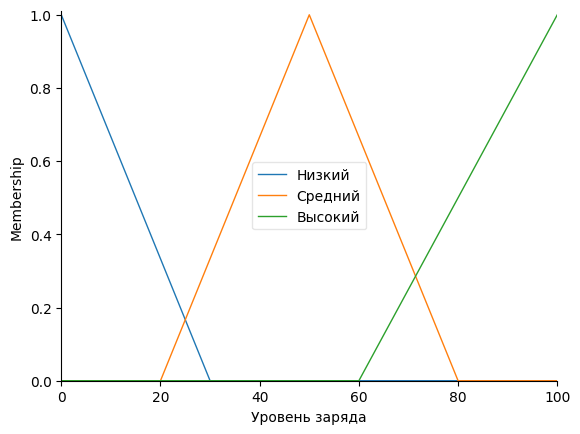

In [416]:
SoC.view()

In [417]:
time_left['Мало'] = fuzz.trimf(time_left.universe, [0, 0, 1])
time_left['Достаточно'] = fuzz.trimf(time_left.universe, [0, 2, 6])
time_left['Много'] = fuzz.trimf(time_left.universe, [4, 10, 24])

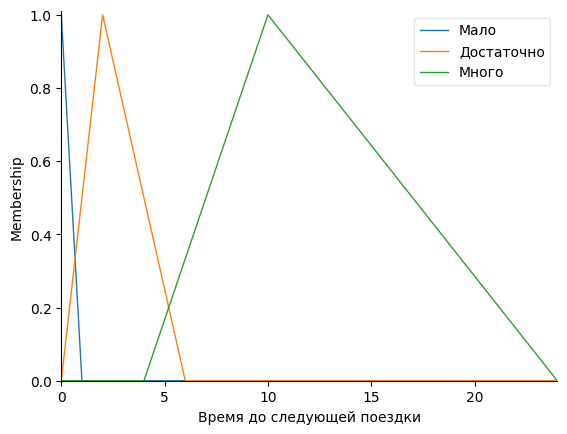

In [418]:
time_left.view()

In [419]:
price['Низкая'] = fuzz.trimf(price.universe, [0.0, 0.0, 0.3])
price['Средняя'] = fuzz.trimf(price.universe, [0.2, 0.5, 0.8])
price['Высокая'] = fuzz.trimf(price.universe, [0.6, 1.0, 1.0])

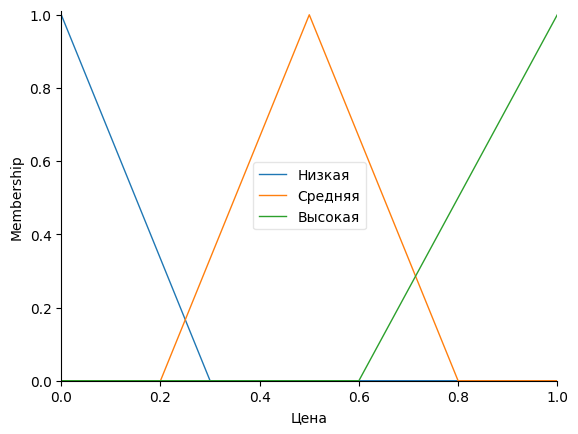

In [420]:
price.view()

In [421]:
power['Выключено'] = fuzz.trimf(power.universe, [0, 0, 10])
power['Медленно'] = fuzz.trimf(power.universe, [0, 25, 50])
power['Нормально'] = fuzz.trimf(power.universe, [30, 60, 90])
power['Быстро'] = fuzz.trimf(power.universe, [70, 100, 100])

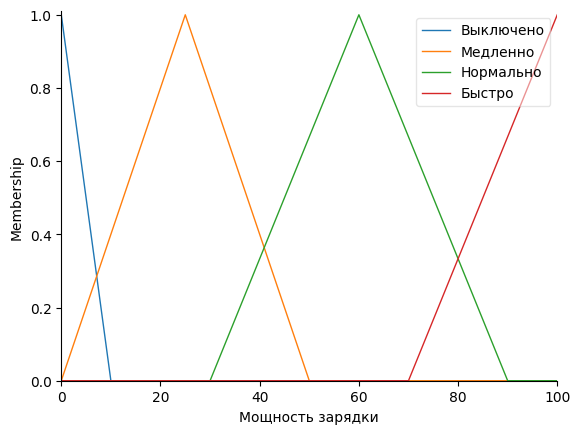

In [422]:
power.view()

In [423]:
rule1 = ctrl.Rule(SoC['Низкий'] & time_left['Мало'] & price['Низкая'], power['Быстро'])
rule2 = ctrl.Rule(SoC['Низкий'] & time_left['Мало'] & price['Высокая'], power['Быстро'])
rule3 = ctrl.Rule(SoC['Низкий'] & time_left['Много'] & price['Низкая'], power['Нормально'])
rule4 = ctrl.Rule(SoC['Высокий'], power['Медленно'])
rule5 = ctrl.Rule(price['Высокая'] & time_left['Много'], power['Медленно'])
rule6 = ctrl.Rule(price['Низкая'] & time_left['Достаточно'], power['Быстро'])

In [424]:
rules = [rule1, rule2, rule3, rule4, rule5, rule6]

charging_ctrl = ctrl.ControlSystem(rules)
charging = ctrl.ControlSystemSimulation(charging_ctrl)

In [425]:
charging.input['Уровень заряда'] = 20
charging.input['Время до следующей поездки'] = 1
charging.input['Цена'] = 0.2

In [426]:
charging.compute()

In [427]:
print(f"Рекомендуемая мощность зарядки: {charging.output['Мощность зарядки']:.2f}%")

Рекомендуемая мощность зарядки: 87.33%


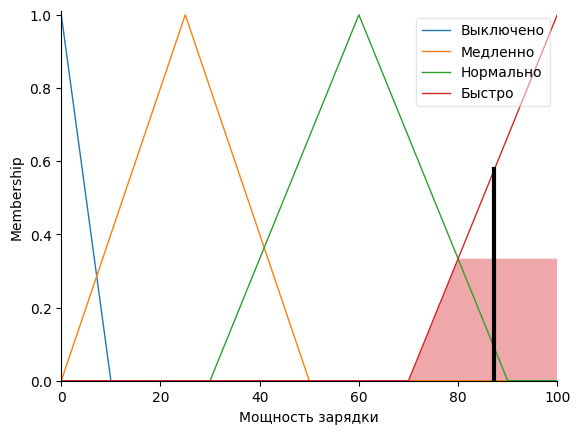

In [428]:
power.view(sim=charging)

# **Трацепивидная функция**

In [429]:
SoC = ctrl.Antecedent(np.arange(0, 101, 1), "Уровень заряда")
time_left = ctrl.Antecedent(np.arange(0, 25, 1), "Время до следующей поездки")
price = ctrl.Antecedent(np.arange(0, 1.01, 0.01), "Цена")
power = ctrl.Consequent(np.arange(0, 101, 1), "Мощность зарядки")

In [430]:
SoC['Низкий'] = fuzz.trapmf(SoC.universe, [0, 0, 20, 40])
SoC['Средний'] = fuzz.trapmf(SoC.universe, [30, 45, 65, 80])
SoC['Высокий'] = fuzz.trapmf(SoC.universe, [70, 90, 100, 100])

time_left['Мало'] = fuzz.trapmf(time_left.universe, [0, 0, 0.5, 1])
time_left['Достаточно'] = fuzz.trapmf(time_left.universe, [0.5, 2, 4, 6])
time_left['Много'] = fuzz.trapmf(time_left.universe, [5, 8, 20, 24])

price['Низкая'] = fuzz.trapmf(price.universe, [0.0, 0.0, 0.2, 0.4])
price['Средняя'] = fuzz.trapmf(price.universe, [0.3, 0.45, 0.6, 0.75])
price['Высокая'] = fuzz.trapmf(price.universe, [0.7, 0.9, 1.0, 1.0])

power['Выключено'] = fuzz.trapmf(power.universe, [0, 0, 5, 15])
power['Медленно'] = fuzz.trapmf(power.universe, [10, 25, 35, 50])
power['Нормально'] = fuzz.trapmf(power.universe, [40, 55, 70, 85])
power['Быстро'] = fuzz.trapmf(power.universe, [80, 90, 100, 100])

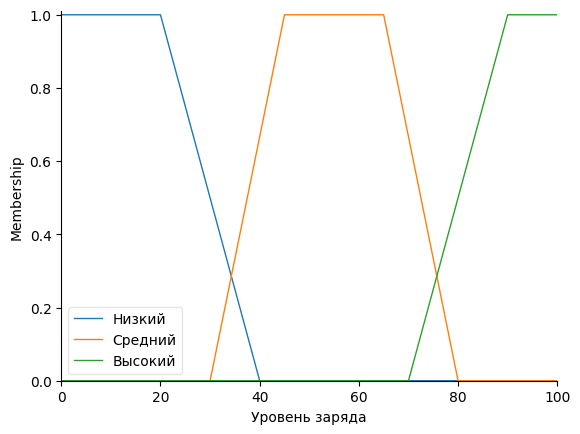

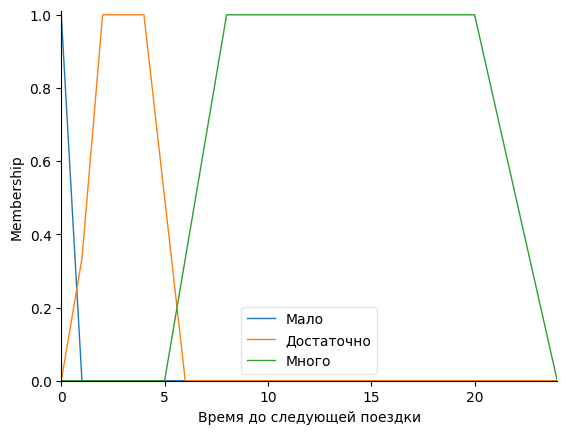

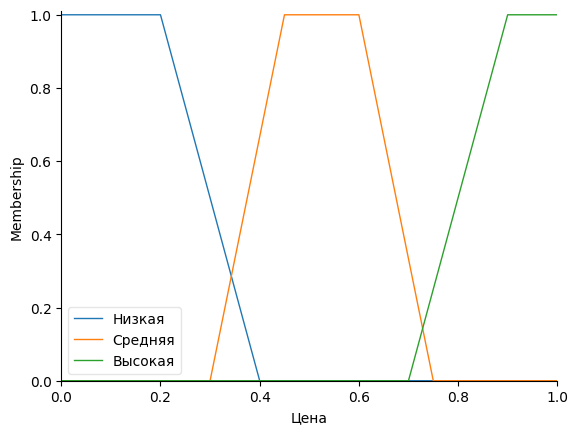

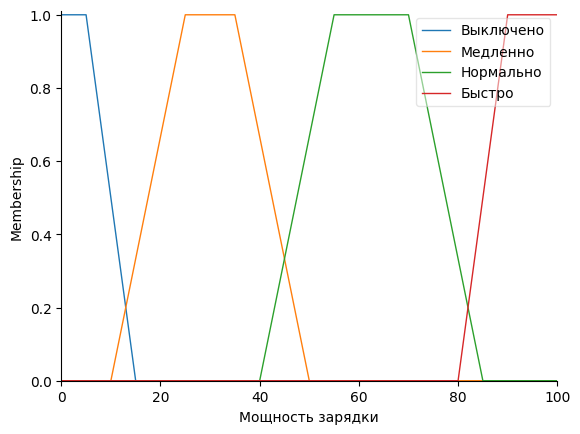

In [431]:
SoC.view()
time_left.view()
price.view()
power.view()

In [432]:
rule1 = ctrl.Rule(SoC['Низкий'] & time_left['Мало'] & price['Низкая'], power['Быстро'])
rule2 = ctrl.Rule(SoC['Низкий'] & time_left['Мало'] & price['Высокая'], power['Быстро'])
rule3 = ctrl.Rule(SoC['Низкий'] & time_left['Много'] & price['Низкая'], power['Нормально'])
rule4 = ctrl.Rule(SoC['Высокий'], power['Медленно'])
rule5 = ctrl.Rule(price['Высокая'] & time_left['Много'], power['Медленно'])
rule6 = ctrl.Rule(price['Низкая'] & time_left['Достаточно'], power['Быстро'])

In [433]:
charging_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
charging = ctrl.ControlSystemSimulation(charging_ctrl)

In [434]:
charging.input['Уровень заряда'] = 90
charging.input['Время до следующей поездки'] = 8
charging.input['Цена'] = 0.7

In [435]:
charging.compute()

In [436]:
print(f"Рекомендуемая мощность зарядки: {charging.output['Мощность зарядки']:.2f}%")

Рекомендуемая мощность зарядки: 30.00%


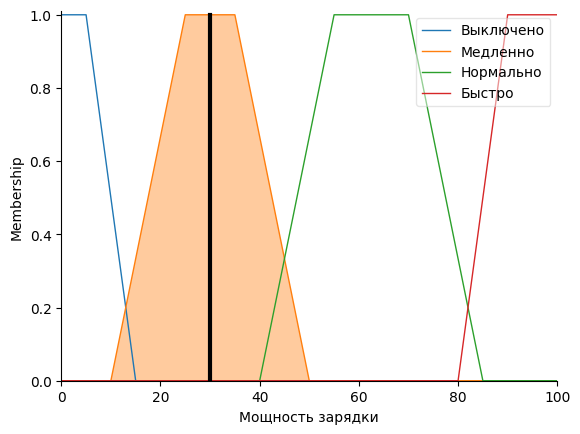

In [437]:
power.view(sim=charging)

# **Функция Гаусса**

In [438]:
SoC = ctrl.Antecedent(np.arange(0, 101, 1), "Уровень заряда")
time_left = ctrl.Antecedent(np.arange(0, 25, 1), "Время до следующей поездки")
price = ctrl.Antecedent(np.arange(0, 1.01, 0.01), "Цена")
power = ctrl.Consequent(np.arange(0, 101, 1), "Мощность зарядки")

In [439]:
SoC['Низкий'] = fuzz.gaussmf(SoC.universe, mean=15, sigma=10)
SoC['Средний'] = fuzz.gaussmf(SoC.universe, mean=50, sigma=15)
SoC['Высокий'] = fuzz.gaussmf(SoC.universe, mean=85, sigma=10)

time_left['Мало'] = fuzz.gaussmf(time_left.universe, mean=0.5, sigma=1)
time_left['Достаточно'] = fuzz.gaussmf(time_left.universe, mean=3, sigma=1.5)
time_left['Много'] = fuzz.gaussmf(time_left.universe, mean=10, sigma=4)

price['Низкая'] = fuzz.gaussmf(price.universe, mean=0.15, sigma=0.1)
price['Средняя'] = fuzz.gaussmf(price.universe, mean=0.5, sigma=0.15)
price['Высокая'] = fuzz.gaussmf(price.universe, mean=0.85, sigma=0.1)

power['Выключено'] = fuzz.gaussmf(power.universe, mean=5, sigma=5)
power['Медленно'] = fuzz.gaussmf(power.universe, mean=30, sigma=10)
power['Нормально'] = fuzz.gaussmf(power.universe, mean=60, sigma=10)
power['Быстро'] = fuzz.gaussmf(power.universe, mean=90, sigma=10)

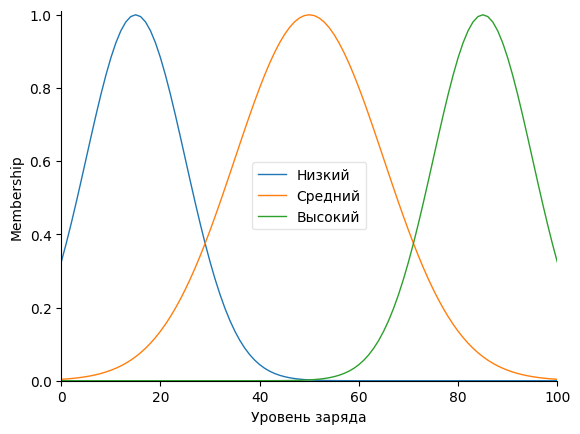

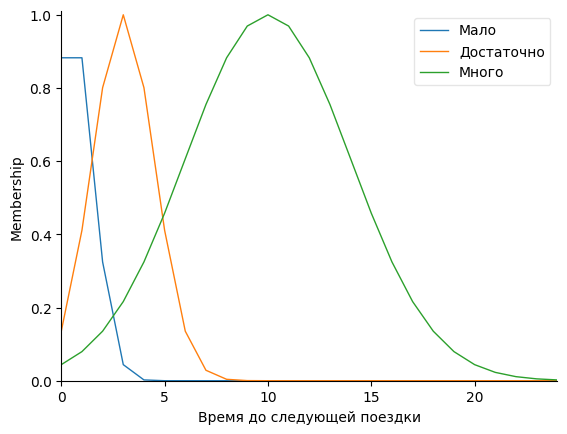

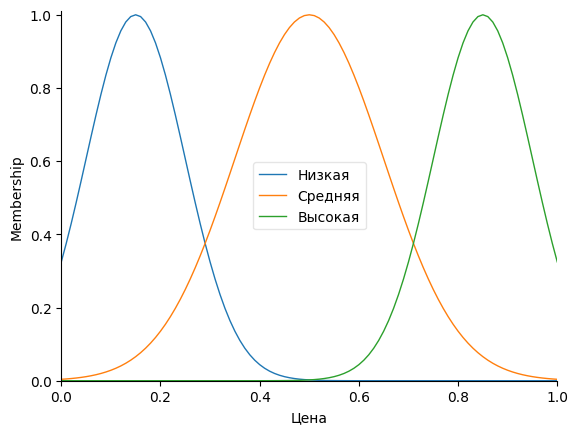

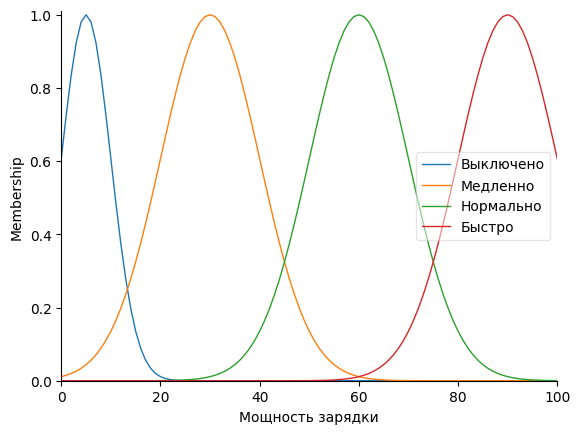

In [440]:
SoC.view()
time_left.view()
price.view()
power.view()

In [441]:
rule1 = ctrl.Rule(SoC['Низкий'] & time_left['Мало'] & price['Низкая'], power['Быстро'])
rule2 = ctrl.Rule(SoC['Низкий'] & time_left['Мало'] & price['Высокая'], power['Быстро'])
rule3 = ctrl.Rule(SoC['Низкий'] & time_left['Много'] & price['Низкая'], power['Нормально'])
rule4 = ctrl.Rule(SoC['Высокий'], power['Медленно'])
rule5 = ctrl.Rule(price['Высокая'] & time_left['Много'], power['Медленно'])
rule6 = ctrl.Rule(price['Низкая'] & time_left['Достаточно'], power['Быстро'])

charging_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
charging = ctrl.ControlSystemSimulation(charging_ctrl)

In [442]:
charging.input['Уровень заряда'] = 25
charging.input['Время до следующей поездки'] = 10
charging.input['Цена'] = 0.2

In [443]:
charging.compute()

Рекомендуемая мощность зарядки: 60.00%


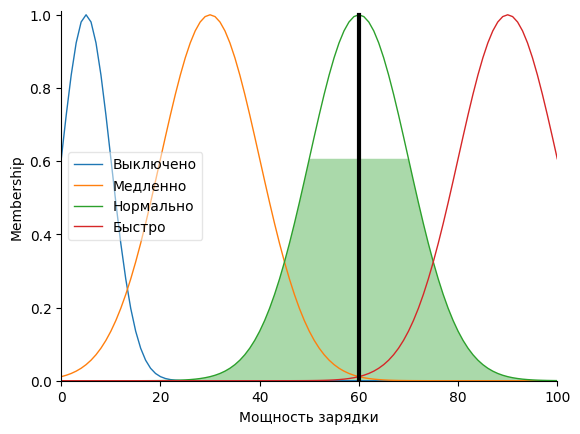

In [444]:
print(f"Рекомендуемая мощность зарядки: {charging.output['Мощность зарядки']:.2f}%")
power.view(sim=charging)